# 9월 RF 분석

In [1]:
import pandas as pd
raw_hourly_df = pd.read_csv("sj_hourly_rainfall_case1.csv")
raw_hourly_df.head()

,date,4001430,4001440,4001450,4003420,4007450,4007470,4007472,4007474,4009460,...,4001450_gpm,4003420_gpm,4007450_gpm,4007470_gpm,4007472_gpm,4007474_gpm,4009460_gpm,9000140_gpm,9000233_gpm,9000234_gpm
0,2014-10-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014-10-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2014-10-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2014-10-01 04:00:00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2014-10-01 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
raw_hourly_df['month'] = pd.DatetimeIndex(raw_hourly_df['date']).month_name()
raw_hourly_df.head()

,date,4001430,4001440,4001450,4003420,4007450,4007470,4007472,4007474,4009460,...,4003420_gpm,4007450_gpm,4007470_gpm,4007472_gpm,4007474_gpm,4009460_gpm,9000140_gpm,9000233_gpm,9000234_gpm,month
0,2014-10-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,October
1,2014-10-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,October
2,2014-10-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,October
3,2014-10-01 04:00:00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,October
4,2014-10-01 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,October


In [3]:
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "January"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "February"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "March"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "April"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "May"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "June"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "July"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "August"]
raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "September"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "October"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "November"]
#raw_hourly_df = raw_hourly_df.loc[raw_hourly_df['month'] == "December"]

## 1. 4001430 Station Random Forest 분석

In [4]:
st_code = "4001430"
x_col = st_code + "_gpm"
y_col = st_code

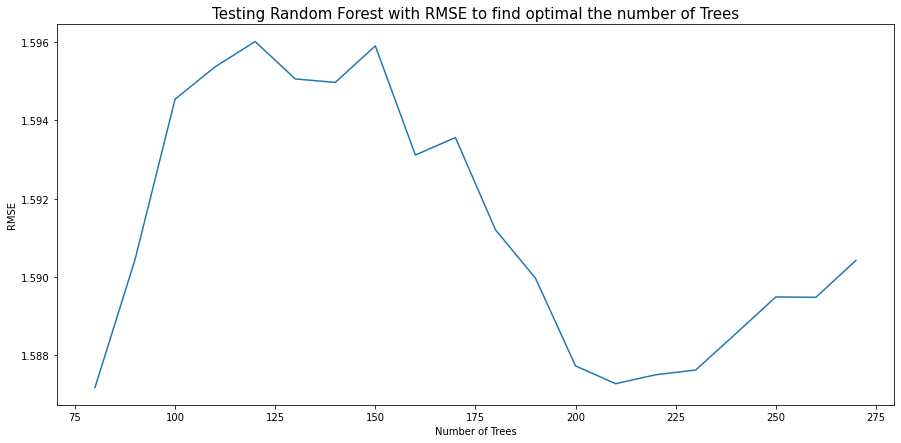

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

rmse_scores = []
estimators = []
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)

rf = RandomForestRegressor(warm_start=True, random_state=2, n_jobs=-1)

est = 80

for i in range(20):
    rf.set_params(n_estimators=est)
    rf.fit(X, y)
    rmse = mean_squared_error(y_test, rf.predict(X_test), squared=False)
    
    rmse_scores.append(rmse)
    estimators.append(est)
    
    est += 10
    
plt.figure(figsize=(15, 7))
plt.plot(estimators, rmse_scores)

plt.xlabel("Number of Trees")
plt.ylabel("RMSE")

plt.title("Testing Random Forest with RMSE to find optimal the number of Trees", fontsize="15")
plt.show()

### Case-1 적용 RF

In [6]:
est_jan=210
cv_num = 20

rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X = raw_hourly_df[[x_col]]
y = raw_hourly_df[y_col]

In [7]:
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-9.97670081e-02, -4.92033452e-01, -3.65113176e-02, -5.74203245e-01,
       -5.47898067e+00, -1.89937353e-01, -1.62384391e+00, -8.74497842e-01,
       -7.53110570e+00, -1.82116542e-01, -4.00633707e-01, -9.51917805e-02,
       -2.06404821e-01, -2.64203532e+00, -1.93877356e+00, -4.20625829e-01,
       -5.52629452e-03, -8.02325159e+00, -1.08209902e-01, -2.56292981e+00])

In [8]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [0.316 0.701 0.191 0.758 2.341 0.436 1.274 0.935 2.744 0.427 0.633 0.309
 0.454 1.625 1.392 0.649 0.074 2.833 0.329 1.601]
RMSE 평균: 1.001


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.stats import gaussian_kde
from scipy.interpolate import interpn
from scipy import stats
from sklearn import linear_model

def density_scatter(x , y, st, bins=20, **kwargs )   :
    """
    Scatter plot colored by 2d histogram
    """
    fig = plt.figure(figsize=(11, 8))
    ax = fig.add_subplot(111)
    data, x_e, y_e = np.histogram2d(x, y, bins = bins, density = True )
    z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) , data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False)

    #To be sure to plot all data
    z[np.where(np.isnan(z))] = 0.0

    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]

    ax.scatter(x, y, c=z, **kwargs )
    norm = Normalize(vmin = np.min(z), vmax = np.max(z))
    cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
    cbar.ax.set_ylabel('Density', fontsize=18)
    cbar.ax.tick_params(labelsize=18) 
    ax.set_title('Ground Rainfall Prediction \n using IMERG in the Station: %i' %st , fontsize=18)
    ax.set_xlabel('Prediction (mm/h)', fontsize=18)
    ax.set_ylabel('Station Observation (mm/h)', fontsize=18)
    xt = [0, 2, 4, 6, 8, 10, 12, 14]
    ax.set_xlim([0, 15])
    ax.set_ylim([0, 15])
    ax.set_xticklabels(xt, fontsize=18)
    ax.set_yticklabels(xt, fontsize=18)

    x_pred = np.linspace(0, 20, 2)            
    x_pred = x_pred.reshape(-1, 1)  
    y_pred = model.predict(x_pred)

    ax.plot(x_pred, y_pred, color='k')
    ax.text(0.55, 0.2, '$y = %.2f x_1 - %.2f $' % (model.coef_[0], abs(model.intercept_)), fontsize=17, transform=ax.transAxes)

/tmp/ipykernel_25430/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_25430/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


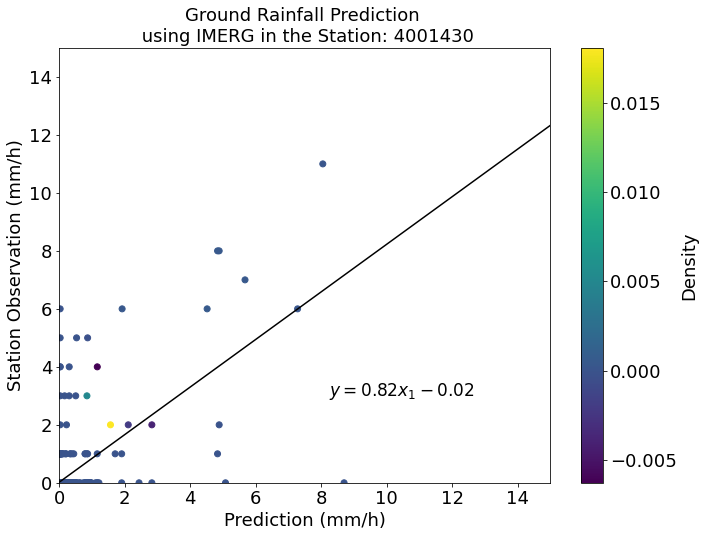

In [10]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [11]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)

scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([  -3.88488461,   -6.36259997,   -7.80101931,   -9.50005307,
         -4.9937087 ,  -13.95272065,  -38.50650279,  -17.52637987,
       -180.02761935,  -49.25668626,  -16.6794129 , -109.24000007,
        -10.24825721,   -2.21473653,  -77.05993117,   -7.93272158,
        -13.04944672,   -5.83896908,   -9.5686075 ,  -20.8957382 ])

In [12]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [ 1.971  2.522  2.793  3.082  2.235  3.735  6.205  4.186 13.417  7.018
  4.084 10.452  3.201  1.488  8.778  2.817  3.612  2.416  3.093  4.571]
RMSE 평균: 4.584
제거된 0의 비율: 94.206


/tmp/ipykernel_25430/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_25430/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


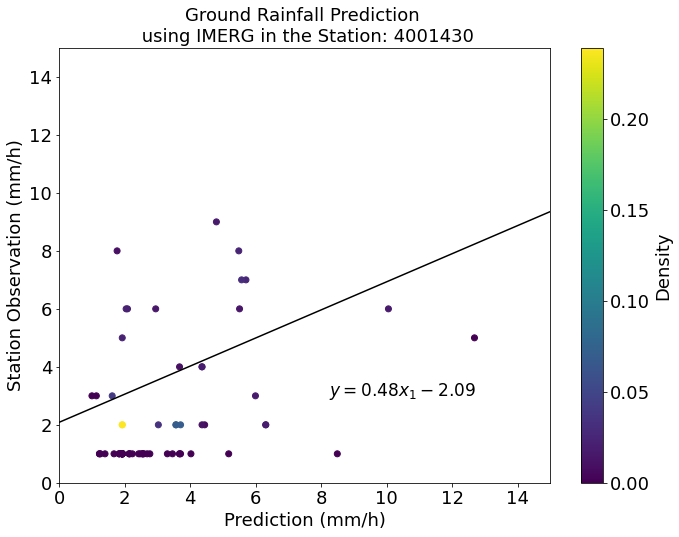

In [13]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [14]:
rmse_case1_all = []
rmse_case2_all = []
zero_count_ratio = []
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 2. 4001440 Station Random Forest 분석

### Case-1 적용 RF

In [15]:
st_code = "4001440"
x_col = st_code + "_gpm"
y_col = st_code

In [16]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)

scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -1.07103967,  -0.33069936,  -0.56612551,  -0.5416237 ,
        -0.67688513,  -0.55966118,  -2.55163302,  -1.42882864,
        -0.58699756,  -1.1267159 ,  -0.23700901,  -0.35164653,
        -0.18909641,  -0.81341181,  -5.05600117,  -1.51082761,
        -0.52971731,  -0.3155001 , -13.19451426,  -0.13616088])

In [17]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [1.035 0.575 0.752 0.736 0.823 0.748 1.597 1.195 0.766 1.061 0.487 0.593
 0.435 0.902 2.249 1.229 0.728 0.562 3.632 0.369]
RMSE 평균: 1.024


/tmp/ipykernel_25430/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_25430/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


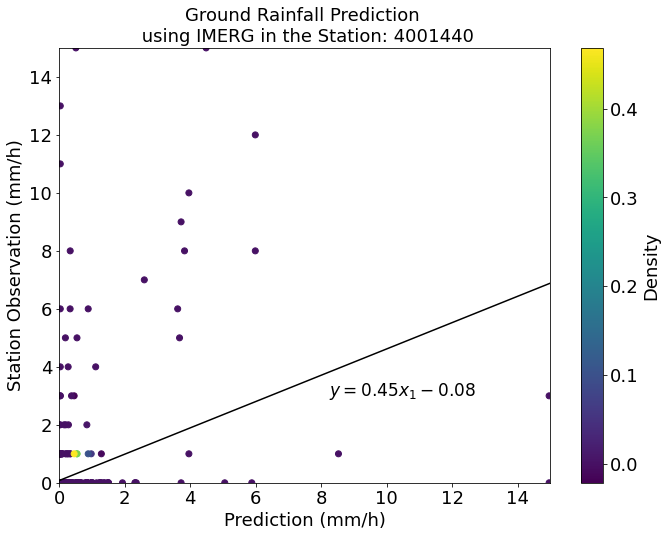

In [18]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [19]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)

scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([  -4.76920345,   -2.45533656, -225.24103177,   -8.10787849,
        -19.54358727,  -10.36092708,   -2.68078868,   -8.67277738,
        -17.1699488 ,  -72.97329146,  -26.4229596 ,   -7.10024801,
        -37.08971307,   -3.65779419,   -7.05573241,  -12.7321676 ,
        -14.30510507,  -74.33453817,  -12.00184214,   -6.64769436])

In [20]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [ 2.184  1.567 15.008  2.847  4.421  3.219  1.637  2.945  4.144  8.542
  5.14   2.665  6.09   1.913  2.656  3.568  3.782  8.622  3.464  2.578]
RMSE 평균: 4.350
제거된 0의 비율: 93.730


/tmp/ipykernel_25430/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_25430/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


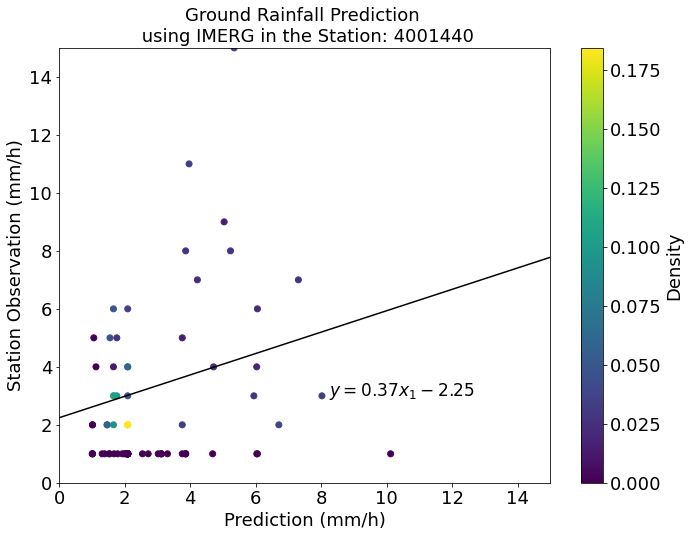

In [21]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [22]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 3. 4001450 Station Random Forest 분석

### Case-1 적용 RF

In [23]:
st_code = "4001450"
x_col = st_code + "_gpm"
y_col = st_code

In [24]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-2.03563354, -0.55528798, -2.27001413, -0.81082427, -3.46295365,
       -0.79911088, -5.37618493, -1.13481395, -0.64441167, -0.64565874,
       -1.05410619, -1.94904077, -0.54559428, -1.04166626, -2.16128361,
       -3.17008396, -2.58966515, -0.11677458, -5.29175709, -0.32143919])

In [25]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [1.427 0.745 1.507 0.9   1.861 0.894 2.319 1.065 0.803 0.804 1.027 1.396
 0.739 1.021 1.47  1.78  1.609 0.342 2.3   0.567]
RMSE 평균: 1.229


/tmp/ipykernel_25430/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_25430/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


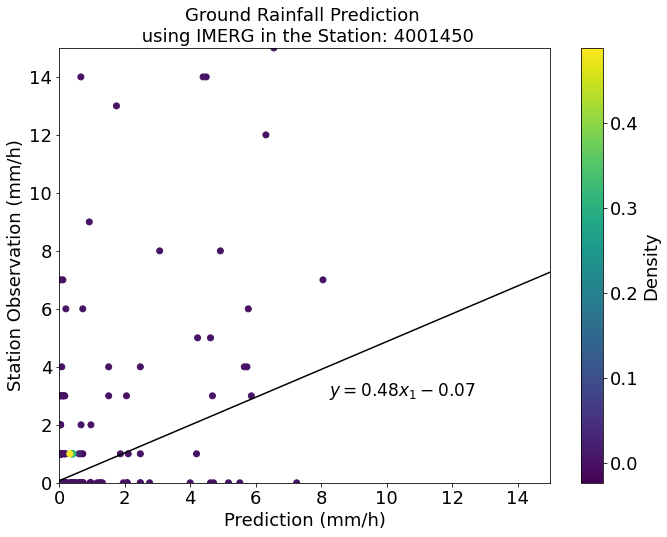

In [26]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [27]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-20.76721091, -11.03028379, -11.88241943, -75.97954998,
        -8.30851286, -31.95218073, -85.91755119, -37.86074203,
       -10.47136137,  -9.91584995,  -6.51776094, -20.47698437,
        -6.38090673,  -9.00638573, -78.52104263,  -2.76779204,
       -46.30263417,  -6.21153438, -14.87266985,  -5.99436851])

In [28]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [4.557 3.321 3.447 8.717 2.882 5.653 9.269 6.153 3.236 3.149 2.553 4.525
 2.526 3.001 8.861 1.664 6.805 2.492 3.857 2.448]
RMSE 평균: 4.456
제거된 0의 비율: 93.194


/tmp/ipykernel_25430/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_25430/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


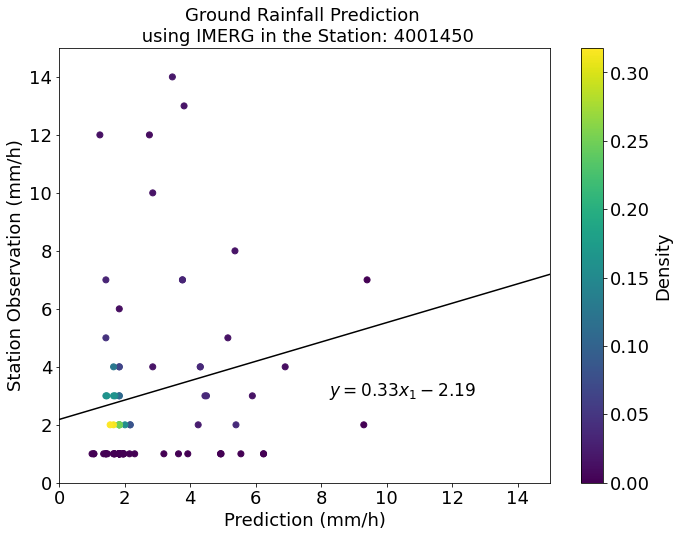

In [29]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [30]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 4. 4003420 Station Random Forest 분석

### Case-1 적용 RF

In [31]:
st_code = "4003420"
x_col = st_code + "_gpm"
y_col = st_code

In [32]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-1.07085434, -0.79852103, -2.3308614 , -0.36515504, -1.03242668,
       -1.18432783, -2.22186908, -0.88309941, -0.71120953, -0.43183133,
       -0.1158479 , -0.73619352, -0.44143164, -0.87230998, -1.92066626,
       -1.57765667, -1.38744661, -0.21343085, -0.85008443, -0.34291686])

In [33]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [1.035 0.894 1.527 0.604 1.016 1.088 1.491 0.94  0.843 0.657 0.34  0.858
 0.664 0.934 1.386 1.256 1.178 0.462 0.922 0.586]
RMSE 평균: 0.934


/tmp/ipykernel_25430/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_25430/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


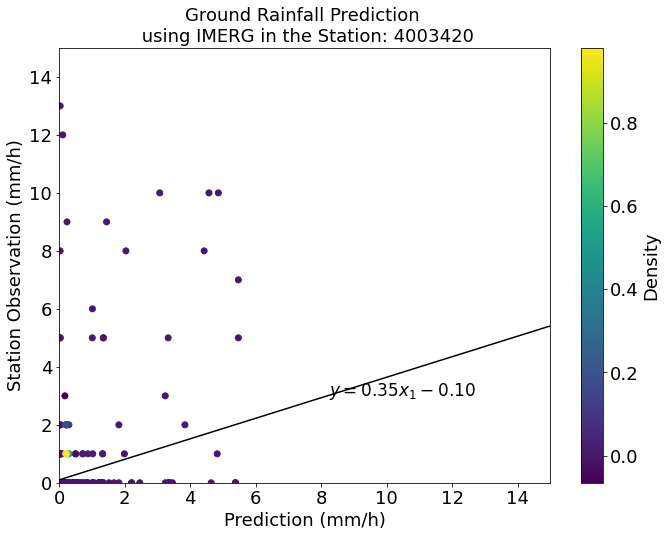

In [34]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [35]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-11.49111205,  -4.67601539, -95.63706277, -11.09118175,
       -13.92386626, -15.8366352 , -26.20687426, -17.19243561,
        -5.0226808 ,  -2.45883826, -59.59620573,  -3.33394797,
        -3.89929684, -14.87768532,  -6.37470893,  -7.73071427,
       -16.42270066, -12.94825195,  -3.41840787,  -8.21831219])

In [36]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [3.39  2.162 9.779 3.33  3.731 3.98  5.119 4.146 2.241 1.568 7.72  1.826
 1.975 3.857 2.525 2.78  4.052 3.598 1.849 2.867]
RMSE 평균: 3.625
제거된 0의 비율: 93.948


/tmp/ipykernel_25430/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_25430/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


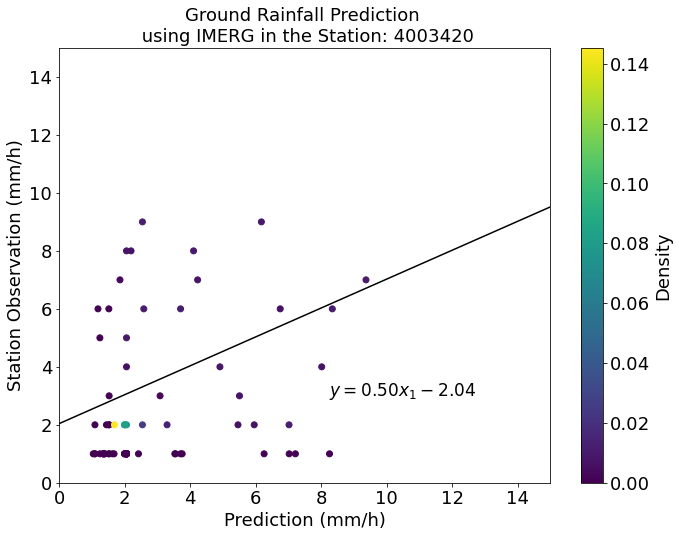

In [37]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [38]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 5. 4007450 Station Random Forest 분석

### Case-1 적용 RF

In [39]:
st_code = "4007450"
x_col = st_code + "_gpm"
y_col = st_code

In [40]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-11.52290807,  -1.3424431 ,  -1.45735164,  -1.44496144,
        -0.63055351, -10.58489962,  -4.4176458 ,  -1.039572  ,
        -0.37158024,  -1.41524875, -12.1074936 ,  -1.06268554,
        -0.80423013,  -1.97425077,  -1.90323695,  -1.69577263,
        -2.00841789,  -1.28790018,  -2.29708105,  -1.55495983])

In [41]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [3.395 1.159 1.207 1.202 0.794 3.253 2.102 1.02  0.61  1.19  3.48  1.031
 0.897 1.405 1.38  1.302 1.417 1.135 1.516 1.247]
RMSE 평균: 1.537


/tmp/ipykernel_25430/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_25430/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


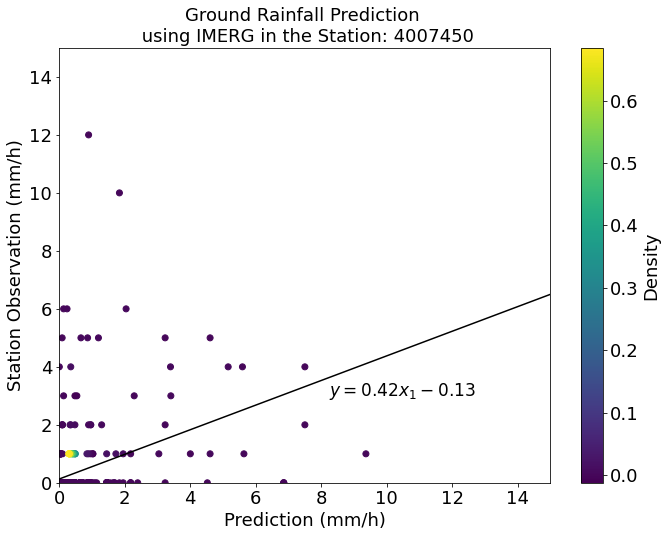

In [42]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [43]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -5.90031801,  -5.1742269 , -10.1234151 ,  -8.70491351,
       -20.14899347, -24.5943527 , -25.64465346,  -8.22405893,
       -10.56628542,  -8.76691053,  -7.28212305, -27.87574026,
       -40.50339825, -14.48784683,  -7.16203966,  -4.42013118,
        -6.37557158,  -4.46102651, -11.59214094, -60.27951847])

In [44]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [2.429 2.275 3.182 2.95  4.489 4.959 5.064 2.868 3.251 2.961 2.699 5.28
 6.364 3.806 2.676 2.102 2.525 2.112 3.405 7.764]
RMSE 평균: 3.658
제거된 0의 비율: 92.639


/tmp/ipykernel_25430/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_25430/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


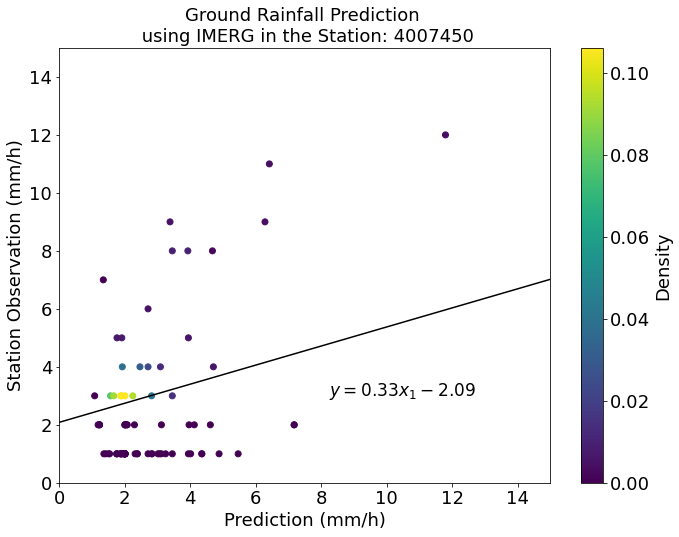

In [45]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [46]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 6. 4007470 Station Random Forest 분석

### Case-1 적용 RF

In [47]:
st_code = "4007470"
x_col = st_code + "_gpm"
y_col = st_code

In [48]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-5.92247881, -5.04265083, -0.42941051, -2.82444521, -3.31016381,
       -2.84676243, -1.31306101, -1.58096951, -4.22824296, -0.73602586,
       -0.50202053, -1.79909135, -0.3470346 , -2.33921987, -2.21582275,
       -4.68922488, -1.11928617, -0.94415957, -1.44066038, -0.37787122])

In [49]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [2.434 2.246 0.655 1.681 1.819 1.687 1.146 1.257 2.056 0.858 0.709 1.341
 0.589 1.529 1.489 2.165 1.058 0.972 1.2   0.615]
RMSE 평균: 1.375


/tmp/ipykernel_25430/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_25430/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


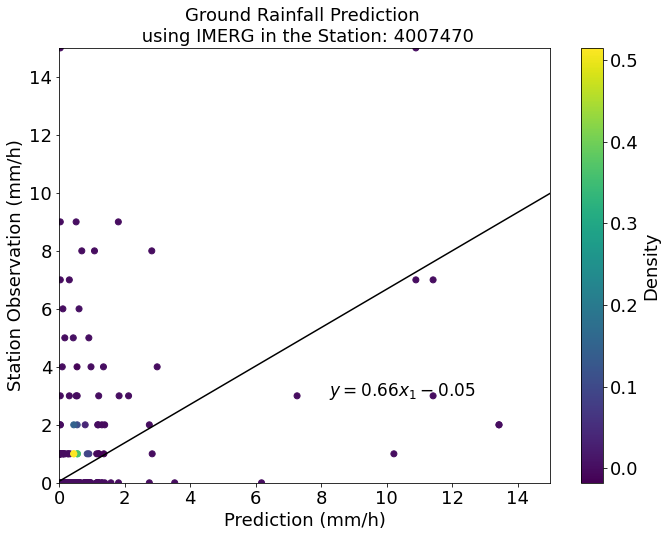

In [50]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [51]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -51.10799854,  -16.35697131,  -47.08608029,   -2.65636839,
         -6.53272896,  -21.78667384,   -2.70834777,  -67.5190903 ,
         -4.4741553 , -156.22438309,  -59.23302856,   -9.68721247,
        -34.67775018,  -24.4872659 ,  -66.85009987,   -4.53888884,
         -7.29364285,  -17.07177168,   -8.44369695,  -37.17628686])

In [52]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [ 7.149  4.044  6.862  1.63   2.556  4.668  1.646  8.217  2.115 12.499
  7.696  3.112  5.889  4.948  8.176  2.13   2.701  4.132  2.906  6.097]
RMSE 평균: 4.959
제거된 0의 비율: 93.056


/tmp/ipykernel_25430/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_25430/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


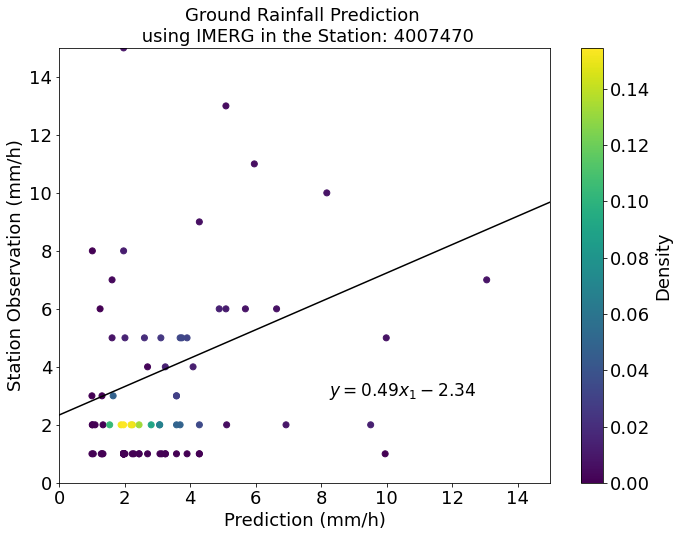

In [53]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [54]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 7. 4007472 Station Random Forest 분석

### Case-1 적용 RF

In [55]:
st_code = "4007472"
x_col = st_code + "_gpm"
y_col = st_code

In [56]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-2.16449612, -0.87508027, -0.25720649, -1.07455125, -1.21685968,
       -1.10754312, -0.67138122, -2.62332886, -7.73853833, -0.72282183,
       -1.97498362, -0.65947691, -0.47978708, -3.70959522, -1.21766025,
       -1.01716317, -1.64741084, -0.52173284, -0.24112727, -1.04877456])

In [57]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [1.471 0.935 0.507 1.037 1.103 1.052 0.819 1.62  2.782 0.85  1.405 0.812
 0.693 1.926 1.103 1.009 1.284 0.722 0.491 1.024]
RMSE 평균: 1.132


/tmp/ipykernel_25430/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_25430/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


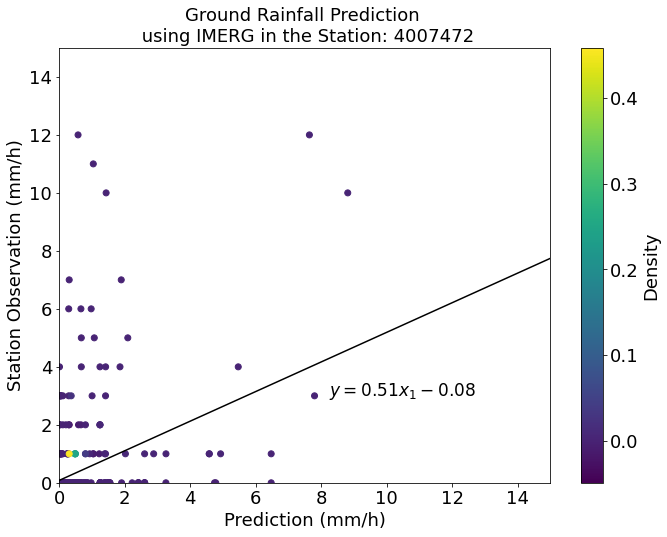

In [58]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [59]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -2.35033621, -80.3682416 , -10.83898982,  -7.13007329,
       -19.27543103, -14.55432837, -38.23375335,  -9.27438691,
        -3.88851451, -14.20679807,  -6.71044868, -10.37599918,
        -5.73232865,  -2.98765119,  -6.76784855, -10.30685061,
       -30.82274328, -25.98842022, -16.72462283,  -8.54177478])

In [60]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [1.533 8.965 3.292 2.67  4.39  3.815 6.183 3.045 1.972 3.769 2.59  3.221
 2.394 1.728 2.602 3.21  5.552 5.098 4.09  2.923]
RMSE 평균: 3.652
제거된 0의 비율: 92.837


/tmp/ipykernel_25430/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_25430/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


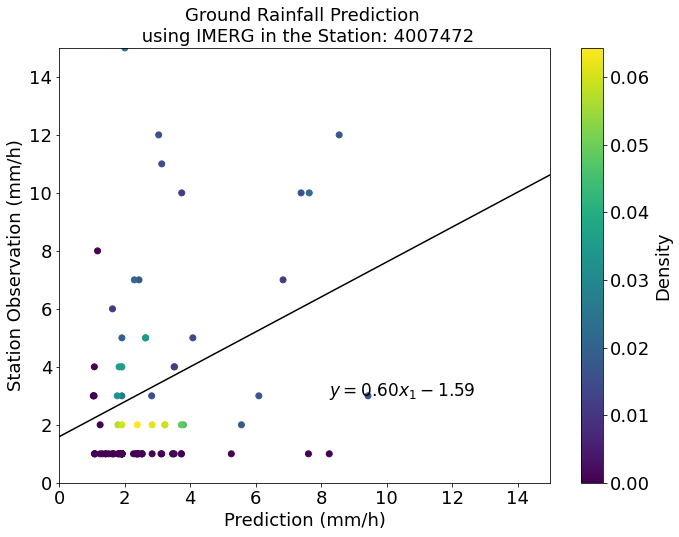

In [61]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [62]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 8. 4007474 Station Random Forest 분석

### Case-1 적용 RF

In [63]:
st_code = "4007474"
x_col = st_code + "_gpm"
y_col = st_code

In [64]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-2.26067294, -2.39663922, -1.52596993, -0.99996836, -6.38502576,
       -0.68198892, -4.06712742, -2.62471563, -0.51012358, -1.4379993 ,
       -0.37774459, -0.66826249, -0.82540709, -1.77533688, -3.3704747 ,
       -1.45285139, -1.25901108, -0.59932489, -0.68938189, -1.65288023])

In [65]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [1.504 1.548 1.235 1.    2.527 0.826 2.017 1.62  0.714 1.199 0.615 0.817
 0.909 1.332 1.836 1.205 1.122 0.774 0.83  1.286]
RMSE 평균: 1.246


/tmp/ipykernel_25430/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_25430/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


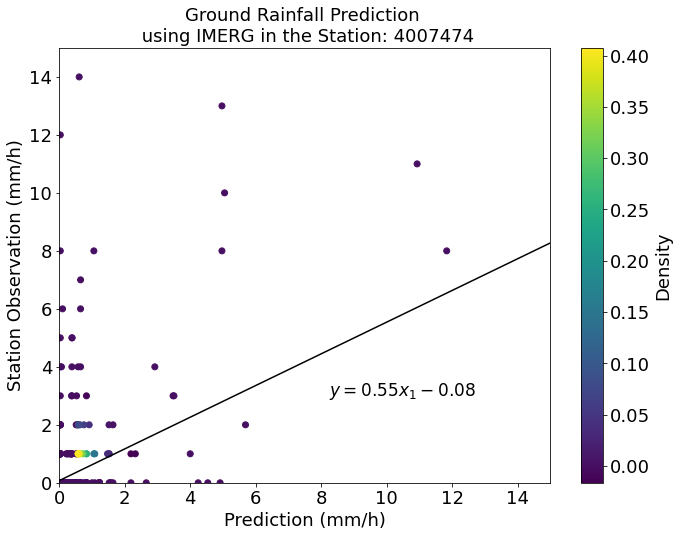

In [66]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [67]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -10.97548251,  -10.2833712 ,   -1.72132534,   -4.77727989,
         -9.10271061,   -2.00565219,  -35.39701184,   -3.82176117,
         -6.01724428,  -39.49655654,  -17.55784893,  -27.01311915,
        -43.65483073, -132.0351825 ,   -8.57960817,  -13.42124144,
        -35.21040934,   -7.04759706,   -7.50703763,   -7.73462189])

In [68]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [ 3.313  3.207  1.312  2.186  3.017  1.416  5.95   1.955  2.453  6.285
  4.19   5.197  6.607 11.491  2.929  3.664  5.934  2.655  2.74   2.781]
RMSE 평균: 3.964
제거된 0의 비율: 92.679


/tmp/ipykernel_25430/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_25430/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


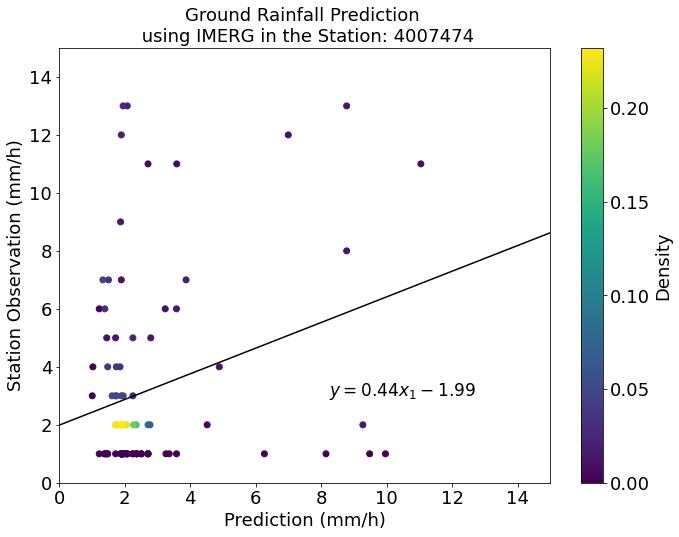

In [69]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [70]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 9. 4009460 Station Random Forest 분석

### Case-1 적용 RF

In [71]:
st_code = "4009460"
x_col = st_code + "_gpm"
y_col = st_code

In [72]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -7.26513314,  -0.67181049,  -0.4455283 ,  -6.27921835,
        -1.38144258, -10.41444542,  -1.83582333,  -0.86747598,
        -0.86551991,  -0.91220098,  -1.03727551,  -1.51590226,
        -0.7538143 ,  -1.99439516,  -2.77874287,  -4.86110456,
        -1.78508346,  -0.19457337,  -0.86619405,  -2.41630595])

In [73]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [2.695 0.82  0.667 2.506 1.175 3.227 1.355 0.931 0.93  0.955 1.018 1.231
 0.868 1.412 1.667 2.205 1.336 0.441 0.931 1.554]
RMSE 평균: 1.396


/tmp/ipykernel_25430/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_25430/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


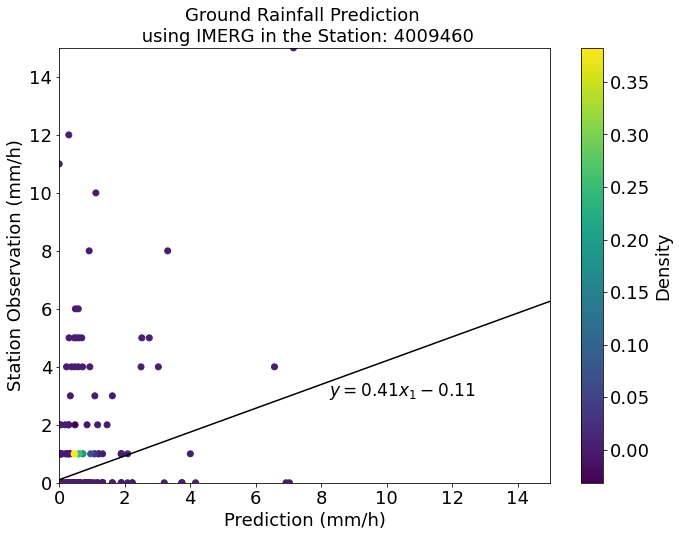

In [74]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [75]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([  -9.5172653 ,  -29.47904103,  -15.1249262 ,  -22.85324648,
       -103.75589266,   -5.5317818 ,  -14.40437454,  -44.96388565,
        -14.43259922,   -3.10927161, -130.32391815,   -7.21841201,
        -16.40816403,  -14.45808724,  -20.6077783 ,   -9.00243565,
        -49.8104717 ,   -3.01242298,   -2.55194512,  -63.93087739])

In [76]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [ 3.085  5.429  3.889  4.781 10.186  2.352  3.795  6.706  3.799  1.763
 11.416  2.687  4.051  3.802  4.54   3.     7.058  1.736  1.597  7.996]
RMSE 평균: 4.683
제거된 0의 비율: 92.996


/tmp/ipykernel_25430/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_25430/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


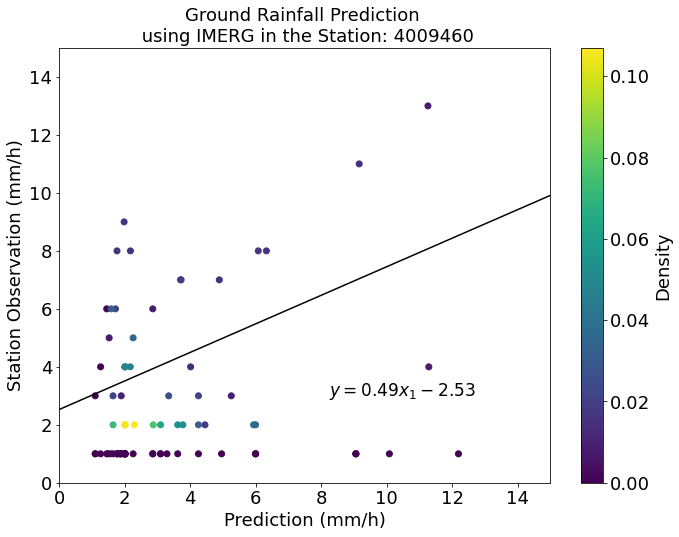

In [77]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [78]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 10. 9000140 Station Random Forest 분석

### Case-1 적용 RF

In [79]:
st_code = "9000140"
x_col = st_code + "_gpm"
y_col = st_code

In [80]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-2.35944751, -3.63309992, -0.38257098, -2.82992718, -2.01738178,
       -1.2390448 , -1.61414881, -3.49754367, -1.42566953, -0.67340757,
       -1.03172085, -1.39331097, -1.5650802 , -5.74103447, -1.57354496,
       -2.36846441, -2.35230584, -1.44212358, -2.18094257, -0.23453391])

In [81]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [1.536 1.906 0.619 1.682 1.42  1.113 1.27  1.87  1.194 0.821 1.016 1.18
 1.251 2.396 1.254 1.539 1.534 1.201 1.477 0.484]
RMSE 평균: 1.338


/tmp/ipykernel_25430/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_25430/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


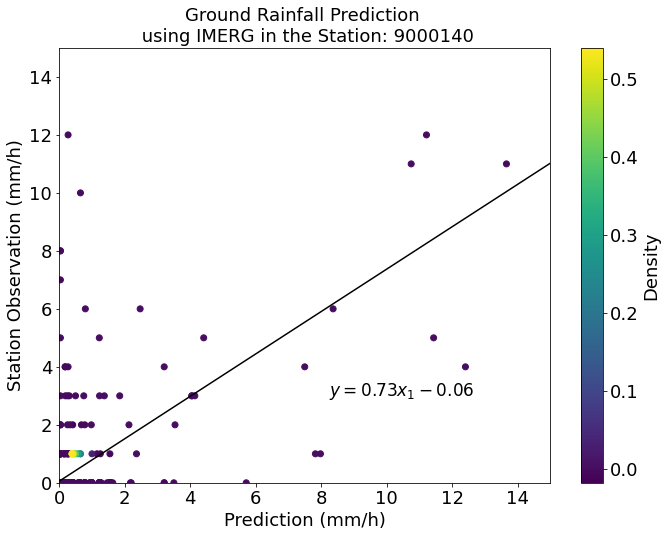

In [82]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [83]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -6.77416185,  -5.73937503,  -7.71755818, -25.22274434,
       -35.64937711, -49.1704352 , -55.88548412, -71.01923987,
       -30.74877993, -12.88805731,  -3.14137658,  -9.79600953,
       -27.64465889,  -4.1803558 , -12.41003059,  -7.612862  ,
       -11.87027823, -11.05571266,  -6.47872038,  -8.27078903])

In [84]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [2.603 2.396 2.778 5.022 5.971 7.012 7.476 8.427 5.545 3.59  1.772 3.13
 5.258 2.045 3.523 2.759 3.445 3.325 2.545 2.876]
RMSE 평균: 4.075
제거된 0의 비율: 92.917


/tmp/ipykernel_25430/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_25430/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


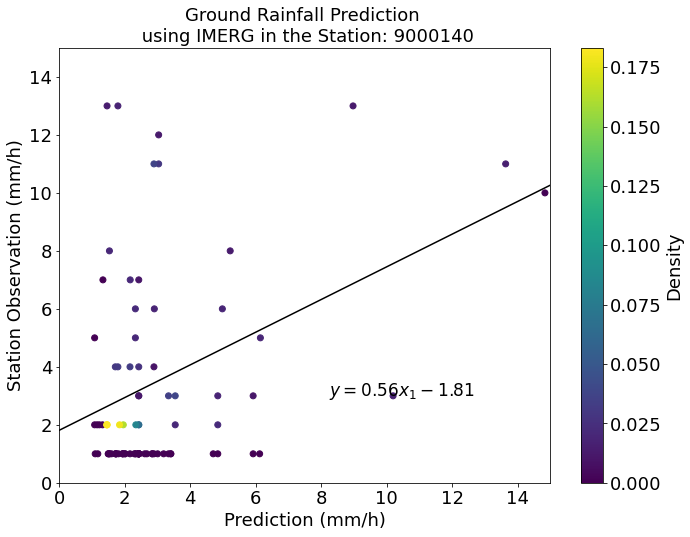

In [85]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [86]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 11. 9000233 Station Random Forest 분석

### Case-1 적용 RF

In [87]:
st_code = "9000233"
x_col = st_code + "_gpm"
y_col = st_code

In [88]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-2.50251996, -0.90970072, -0.42703466, -1.7787527 , -0.54301704,
       -4.65354088, -7.47073377, -3.00234774, -1.0976309 , -1.42453437,
       -2.5637354 , -0.67875255, -0.69379731, -1.82417589, -1.49616004,
       -0.88592982, -3.10982083, -1.23575127, -0.54100942, -1.29195089])

In [89]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [1.582 0.954 0.653 1.334 0.737 2.157 2.733 1.733 1.048 1.194 1.601 0.824
 0.833 1.351 1.223 0.941 1.763 1.112 0.736 1.137]
RMSE 평균: 1.282


/tmp/ipykernel_25430/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_25430/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


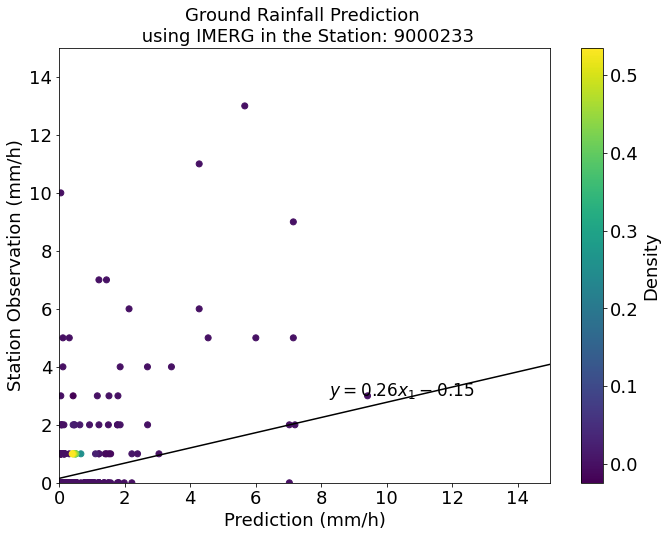

In [90]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [91]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-12.90647   , -12.75174427, -13.62323734, -15.03055593,
       -35.72687918,  -4.05040517,  -8.77270493,  -6.7013056 ,
       -15.36944717, -60.71042618, -24.53438567, -49.34087817,
       -93.93919489,  -9.76826591,  -7.85500904,  -2.79557392,
       -26.60765241,  -2.59419579,  -7.32172222,  -9.5342225 ])

In [92]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [3.593 3.571 3.691 3.877 5.977 2.013 2.962 2.589 3.92  7.792 4.953 7.024
 9.692 3.125 2.803 1.672 5.158 1.611 2.706 3.088]
RMSE 평균: 4.091
제거된 0의 비율: 92.341


/tmp/ipykernel_25430/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_25430/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


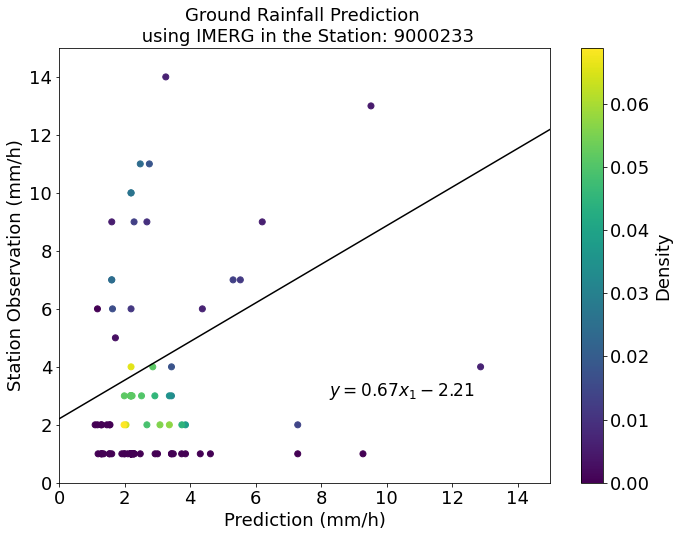

In [93]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [94]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

## 12. 9000234 Station Random Forest 분석

### Case-1 적용 RF

In [95]:
st_code = "9000234"
x_col = st_code + "_gpm"
y_col = st_code

In [96]:
rf = RandomForestRegressor(n_estimators=est_jan, random_state=2, n_jobs=-1)
X_val = raw_hourly_df[[x_col]]
y_val = raw_hourly_df[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([-3.94724741, -3.29902217, -0.71159428, -1.85353312, -0.6895556 ,
       -5.45946621, -5.6639981 , -2.90130055, -0.38488594, -1.01072559,
       -0.38724525, -0.66821441, -0.74296611, -2.15188863, -1.31075598,
       -2.52857442, -1.14581798, -1.13580786, -2.79348242, -1.9170137 ])

In [97]:
rmse_case1 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case1, 3))
print('RMSE 평균: %0.3f' % (rmse_case1.mean()))

RMSE: [1.987 1.816 0.844 1.361 0.83  2.337 2.38  1.703 0.62  1.005 0.622 0.817
 0.862 1.467 1.145 1.59  1.07  1.066 1.671 1.385]
RMSE 평균: 1.329


/tmp/ipykernel_25430/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_25430/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


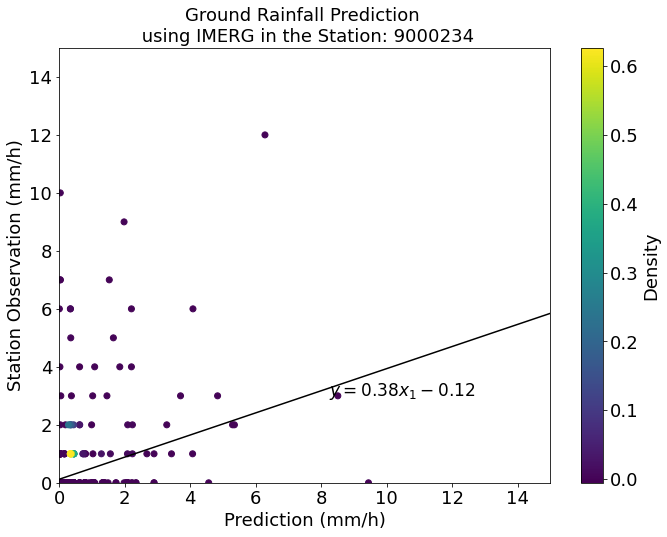

In [98]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

### Case-2 적용 RF

In [99]:
raw_hourly_df_new = raw_hourly_df[raw_hourly_df[y_col].loc[:]!=0].dropna()
zero_count = (len(raw_hourly_df) - len(raw_hourly_df_new))/len(raw_hourly_df)*100
X_val = raw_hourly_df_new[[x_col]]
y_val = raw_hourly_df_new[y_col]

X, X_test, y, y_test = train_test_split(X_val, y_val, random_state=2)
scores = cross_val_score(rf, X, y, scoring="neg_mean_squared_error", cv=cv_num)
scores

array([ -3.56608619,  -3.96532459,  -2.37948545, -11.89897372,
       -19.38363098,  -8.64668927,  -9.82329393,  -5.06080328,
       -27.14890845, -12.4486967 ,  -6.76163921, -12.17008756,
       -20.6189761 , -93.07515023, -79.06574718, -38.52200907,
       -47.32900132,  -2.91817694,  -5.74769235, -42.49343738])

In [100]:
rmse_case2 = np.sqrt(-scores)
print('RMSE:', np.round(rmse_case2, 3))
print('RMSE 평균: %0.3f' % (rmse_case2.mean()))
print('제거된 0의 비율: %0.3f' % (zero_count))

RMSE: [1.888 1.991 1.543 3.449 4.403 2.941 3.134 2.25  5.21  3.528 2.6   3.489
 4.541 9.648 8.892 6.207 6.88  1.708 2.397 6.519]
RMSE 평균: 4.161
제거된 0의 비율: 92.639


/tmp/ipykernel_25430/3568802080.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xt, fontsize=18)
/tmp/ipykernel_25430/3568802080.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(xt, fontsize=18)


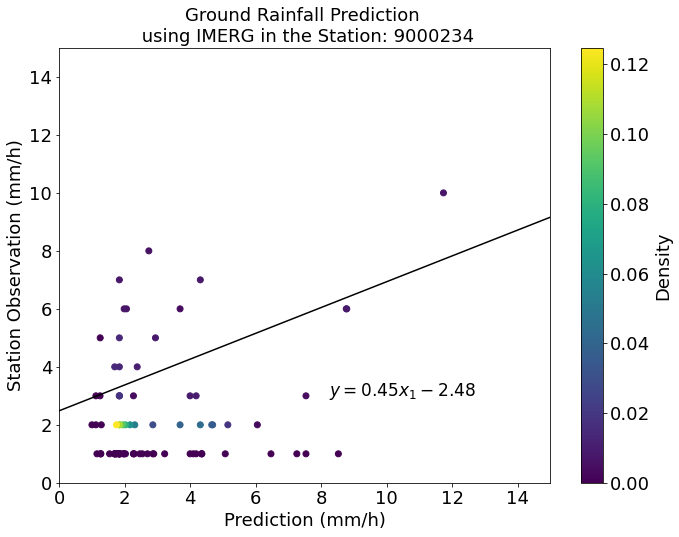

In [101]:
rf.fit(X, y)
rf.predict(X_test)
ols = linear_model.LinearRegression()
X = X_test[x_col].values.reshape(-1, 1)
y = rf.predict(X_test)
model = ols.fit(X, y)
density_scatter(rf.predict(X_test), y_test.values, int(st_code), bins = [20,20])

In [102]:
rmse_case1_all.append(rmse_case1.mean())
rmse_case2_all.append(rmse_case2.mean())
zero_count_ratio.append(zero_count)

In [103]:
rmse_case1_all

[1.0011056382720813,
 1.0237374071426055,
 1.2287523004872924,
 0.9340366786778265,
 1.5369676080015664,
 1.375310237595069,
 1.132306259424953,
 1.2458119213519443,
 1.3963389756369895,
 1.3381964680713188,
 1.2822253165280248,
 1.3289887103018128]

In [104]:
rmse_case2_all

[4.5839873121879,
 4.349651711457996,
 4.455806595174626,
 3.6248604228551784,
 3.658022573346119,
 4.958685626705344,
 3.652191931063258,
 3.964020835079956,
 4.683370967570131,
 4.074891674471331,
 4.090809494854808,
 4.160864812246775]

In [105]:
zero_count_ratio

[94.2063492063492,
 93.73015873015873,
 93.19444444444444,
 93.9484126984127,
 92.63888888888889,
 93.05555555555556,
 92.8373015873016,
 92.67857142857143,
 92.99603174603175,
 92.91666666666667,
 92.34126984126985,
 92.63888888888889]

In [107]:
import pandas as pd
 
data = {'CASE_1_RMSE': pd.Series(rmse_case1_all,
                       index=raw_hourly_df.columns[1:13].values),
        'CASE_2_RMSE': pd.Series(rmse_case2_all,
                       index=raw_hourly_df.columns[1:13].values),
        'Zero_Ratio(%)': pd.Series(zero_count_ratio,
                       index=raw_hourly_df.columns[1:13].values)}

df = pd.DataFrame(data)
 
# Print the data
df.to_csv("rf_9월.csv")
df

,CASE_1_RMSE,CASE_2_RMSE,Zero_Ratio(%)
4001430,1.001106,4.583987,94.206349
4001440,1.023737,4.349652,93.730159
4001450,1.228752,4.455807,93.194444
4003420,0.934037,3.624860,93.948413
4007450,1.536968,3.658023,92.638889
4007470,1.375310,4.958686,93.055556
4007472,1.132306,3.652192,92.837302
4007474,1.245812,3.964021,92.678571
4009460,1.396339,4.683371,92.996032
9000140,1.338196,4.074892,92.916667
